In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# %cd /Users/matthewgreenberg/Desktop/PDFFitTest
import pymatgen as pm
from diffpy.pdffit2 import PdfFit
from diffpy.Structure import loadStructure
from pymatgen.io.cif import CifWriter
from pymatgen.io.cif import CifParser
import os

In [2]:
# Specify the path to your .cif file
# cif_file_path = "/Users/matthewgreenberg/Desktop/PDFFitTest/CsPbBr3_Orthorhombic.cif"
cif_file_path_Br = '/Users/chenghunglin/Documents/Git_BNL/general_practice/pdffit2_example/CsPbCl3/CsPbBr3_Orthorhombic.cif'
cif_file_path_Cl = '/Users/chenghunglin/Documents/Git_BNL/general_practice/pdffit2_example/CsPbCl3/CsPbCl3_cubic.cif'

In [3]:
# Initialize the CifParser with the path to your .cif file
# Parse the .cif file
pym_cif = []
for cif in [cif_file_path_Br, cif_file_path_Cl]:
    parser = CifParser(cif)
    structure = parser.get_structures()[0] 
    structure.remove_oxidation_states()
    print(structure, '\n\n')
    fn_pym = os.path.dirname(cif) + '/' + os.path.basename(cif)[:-4] + '_pym.cif'
    w = CifWriter(structure,symprec=0.1)
    w.write_file(fn_pym)
    pym_cif.append(fn_pym)

Full Formula (Cs4 Pb4 Br12)
Reduced Formula: CsPbBr3
abc   :   8.101078   8.453847  11.878911
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (20)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Cs    0.019452  0.060163  0.75
  1  Cs    0.980548  0.939837  0.25
  2  Cs    0.519452  0.439837  0.25
  3  Cs    0.480548  0.560163  0.75
  4  Pb    0.5       0         0
  5  Pb    0         0.5       0
  6  Pb    0         0.5       0.5
  7  Pb    0.5       0         0.5
  8  Br    0.802792  0.201022  0.031701
  9  Br    0.197208  0.798978  0.968299
 10  Br    0.302792  0.298978  0.968299
 11  Br    0.697208  0.701022  0.031701
 12  Br    0.697208  0.701022  0.468299
 13  Br    0.302792  0.298978  0.531701
 14  Br    0.197208  0.798978  0.531701
 15  Br    0.802792  0.201022  0.468299
 16  Br    0.440335  0.006259  0.25
 17  Br    0.559665  0.993741  0.75
 18  Br    0.940335  0.493741  0.75
 19  Br    0.059665  0.50

/var/folders/gn/7h2xsmb5013_qmqytmsw3hcm0000gq/T/ipykernel_71224/508662670.py:6: FutureWarning: get_structures is deprecated
get_structures is deprecated and will be removed in 2024. Use parse_structures instead.The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structure = parser.get_structures()[0]


In [4]:
# Create new PDF calculator object.
pf = PdfFit()


******************************************************************************
*                      P D F F I T   Version   1.4.3                         *
*                                              2024-01-13                    *
* -------------------------------------------------------------------------- *
* (c) 1998-2007 Trustees of the Michigan State University.                   *
* (c) 2008-2024 Trustees of the Columbia University                          *
*               in the city of New York.                                     *
*                                                                            *
* Authors:                                                                   *
*     Thomas Proffen        -   Email: tproffen@lanl.gov                     *
*     Jacques Bloch         -   Email: bloch@pa.msu.edu                      *
*     Christopher Farrow    -   Email: clf2121@columbia.edu                  *
*     Pavol Juhas           -   Email: pjuhas@bnl.g

In [5]:
# Load experimental x-ray PDF data
qmax = 20.0  # Q-cutoff used in PDF calculation in 1/A
qdamp = 0.03 # instrument Q-resolution factor, responsible for PDF decay
pf.read_data('CsPbBr2-Cl_64micl_10m_20220330-234135_b41155.gr', 'X', qmax, qdamp)

 Reading 2 columns ...
 Read PDF data set 1  (r = 0.01 to 100 A, 10000 points) ...
 ****WARN****
 Uncertainties on G(r) were absent or unreadable in your input
 data.  The program reset these uncertainties to unity.  This
 does not affect at all the refined parameter values.  However,
 the values of the estimated uncertainties on these refined
 parameter values are not reliable.
 ****WARN****



In [6]:
# Load and add structure ------------------------------------------------------------------
for pym in pym_cif:
    stru = loadStructure(pym)
    stru.Uisoequiv = 0.04
    stru.title = os.path.basename(pym)[:-4]
    #Add loaded .cif 
    pf.add_structure(stru)

 Structure file format  : PDFFIT
 Phase number           : 1
 Phase title            : CsPbBr3_Orthorhombic_pym

 Lattice parameters     : 8.45385             11.8789             8.10108
           & angles     : 90                  90                  90
 Unit cell volume       : 813.53
 Number density         : 0.0245842
 Metric tensor          : 71.4675             0                   0
                          0                   141.109             0
                          0                   0                   65.6275

 Recip. lat. parameters : 0.118289            0.0841828           0.12344
               & angles : 90                  90                  90
 Recip. unit cell vol.  : 0.00122921
 Recip. metric tensor   : 0.0139924           0                   0
                          0                   0.00708674          0
                          0                   0                   0.0152375

 Structure file format  : PDFFIT
 Phase number           : 2
 Phase tit

In [7]:
# Check num of phases in PDF calculator object
pf.num_phases()

2

In [8]:
# Switch to phase 1.
# Print num of atoms and nelement symbols to check.
pf.setphase(1)
print(f'{pf.num_atoms() = }')
print(f'{pf.get_atoms() = }')

pf.num_atoms() = 20
pf.get_atoms() = ['CS', 'CS', 'CS', 'CS', 'PB', 'PB', 'PB', 'PB', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR']


In [9]:
# Configure Refinement of phase 1: CsPbBr3 ------------------------------

# Refine lattice parameters a, b, c.
pf.constrain(pf.lat(1), "@11")
pf.constrain(pf.lat(2), "@12")
pf.constrain(pf.lat(3), "@13")
# set initial value of parameter @1, @2, @3
pf.setpar(11, pf.lat(1))
pf.setpar(12, pf.lat(2))
pf.setpar(13, pf.lat(3))

# Refine phase scale factor.  Right side can have formulas.
pf.constrain('pscale', '@111')
pf.setpar(111, 0.5)
# pf.setpar(20, pf.getvar(pf.pscale) / 2.0)

# Refine sharpening factor for correlated motion of close atoms.
pf.constrain(pf.delta2, '@122')
pf.setpar(122, 6.87)

# Refine diameter for the spherical particle
pf.constrain(pf.spdiameter, '@133')
pf.setpar(133, 46)

# Set temperature factors isotropic to each atom with an initial value 0.04
# idx starts from 1 not 0
# 1-4: Cs
for idx in range(1, 5):
    pf.constrain(pf.u11(idx), '@101')
    pf.constrain(pf.u22(idx), '@101')
    pf.constrain(pf.u33(idx), '@101')
pf.setpar(101, 0.04)

# 5-8: Pb
for idx in range(5, 9):
    pf.constrain(pf.u11(idx), '@102')
    pf.constrain(pf.u22(idx), '@102')
    pf.constrain(pf.u33(idx), '@102')
pf.setpar(102, 0.04)

# 9-16: Br
for idx in range(9, 17):
    pf.constrain(pf.u11(idx), '@103')
    pf.constrain(pf.u22(idx), '@103')
    pf.constrain(pf.u33(idx), '@103')
pf.setpar(103, 0.04)

# 16-20: Br
for idx in range(17, 21):
    pf.constrain(pf.u11(idx), '@104')
    pf.constrain(pf.u22(idx), '@104')
    pf.constrain(pf.u33(idx), '@104')
pf.setpar(104, 0.1)

In [10]:
# Switch to phase 2.
# Print num of atoms and nelement symbols to check.
pf.setphase(2)
print(f'{pf.num_atoms() = }')
print(f'{pf.get_atoms() = }')

pf.num_atoms() = 5
pf.get_atoms() = ['CS', 'PB', 'CL', 'CL', 'CL']


In [11]:
# Configure Refinement of phase 1: CsPbCl3 ------------------------------

# Refine lattice parameters a, b, c.
pf.constrain(pf.lat(1), "@21")
pf.constrain(pf.lat(2), "@21")
pf.constrain(pf.lat(3), "@21")
# set initial value of parameter @1, @2, @3
pf.setpar(21, pf.lat(1))
pf.setpar(21, pf.lat(2))
pf.setpar(21, pf.lat(3))

# Refine phase scale factor.  Right side can have formulas.
pf.constrain('pscale', '1-@111')
# pf.setpar(111, 0.5)
# pf.setpar(20, pf.getvar(pf.pscale) / 2.0)

# Refine sharpening factor for correlated motion of close atoms.
# same delta2 as in phase 1
pf.constrain(pf.delta2, '@122')
# pf.setpar(122, 0.0003)

# Refine diameter for the spherical particle
pf.constrain(pf.spdiameter, '@233')
pf.setpar(233, 20)

# Set temperature factors isotropic to each atom with an initial value 0.04
# idx starts from 1 not 0
# 1: Cs  -->  same temperature factor as Cs in phase 1
for idx in range(1, 2):
    pf.constrain(pf.u11(idx), '@101')
    pf.constrain(pf.u22(idx), '@101')
    pf.constrain(pf.u33(idx), '@101')
pf.setpar(101, 0.04)

# 2: Pb  -->  same temperature factor as Pb in phase 1
for idx in range(2, 3):
    pf.constrain(pf.u11(idx), '@102')
    pf.constrain(pf.u22(idx), '@102')
    pf.constrain(pf.u33(idx), '@102')
pf.setpar(102, 0.04)

# 3-5: Cl
for idx in range(3, 6):
    pf.constrain(pf.u11(idx), '@203')
    pf.constrain(pf.u22(idx), '@203')
    pf.constrain(pf.u33(idx), '@203')
pf.setpar(203, 0.04)

In [12]:
# Refine PDF damping due to instrument Q-resolution.
# Left side can be also passed as a reference to PdfFit object
# pf.constrain(pf.qdamp, '@901')
# pf.setpar(901, 0.03)

# Refine data scale factor
pf.constrain(pf.dscale, '@902')
pf.setpar(902, 0.65)

# Set value for Qdamp, Qbraod
pf.setvar(pf.qdamp, 0.033)
pf.setvar(pf.qbroad, 0.016)

In [13]:
pf.pdfrange?

Signature: pf.pdfrange(iset, rmin, rmax)
Docstring:
pdfrange(iset, rmin, rmax) --> Set the range of the fit.

iset    -- data set to consider
rmin    -- minimum r-value of fit
rmax    -- maximum r-value of fit

Raises: ValueError for bad input values
File:      /opt/anaconda3/envs/py3.12_base/lib/python3.12/site-packages/diffpy/pdffit2/pdffit.py
Type:      method

In [14]:
# Refine 

pf.pdfrange(1, 2.5, 60)
pf.refine()

# Save results
pf.save_pdf(1, "CsPbBr2-Cl_64micl_refinement.fgr")
pf.save_struct(1, "CsPbBr2-Cl_64micl_refinement.rstr")
pf.save_res("CsPbBr2-Cl_64micl_refinement.res")

*******************
Starting refinement
*******************
 Dataset: 1   Phase: 1  2  

******************************** ITER: 0 ********************************

 Refinement parameters :
  11:  8.453847    12: 11.878911    13:  8.101078    21:  5.605000
 101:  0.040000   102:  0.040000   103:  0.040000   104:  0.100000
 111:  0.500000   122:  6.870000   133: 46.000000   203:  0.040000
 233: 20.000000   902:  0.650000  

 chisq.: 103.604   red.chisq.: 0.0180589   Rw: 0.733192

******************************** ITER: 1 ********************************

 Refinement parameters :
  11:  8.453847    12: 11.878911    13:  8.101078    21:  5.605000
 101:  0.040000   102:  0.040000   103:  0.040000   104:  0.100000
 111:  0.500000   122:  6.870000   133: 46.000000   203:  0.040000
 233: 20.000000   902:  0.650000  

 chisq.: 103.604   red.chisq.: 0.0180589   Rw: 0.733192

******************************** ITER: 2 ********************************

 Refinement parameters :
  11:  8.453847    12: 

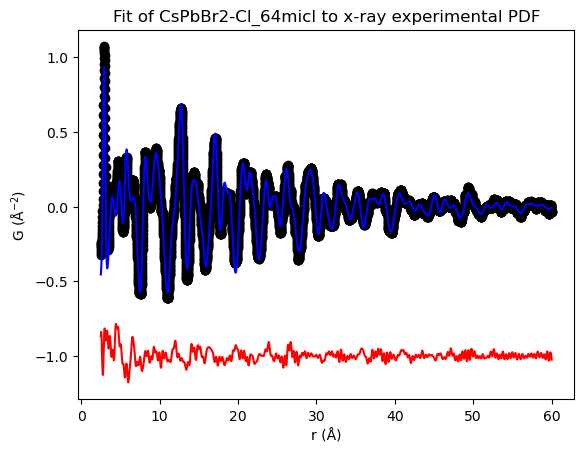

In [15]:
# Plot results

# pylab is matplotlib interface with MATLAB-like plotting commands
import pylab

# obtain data from PdfFit calculator object
r = pf.getR()
Gobs = pf.getpdf_obs()
Gfit = pf.getpdf_fit()

# calculate difference curve, with pylab arrays it can be done
# without for loop
Gdiff = pylab.array(Gobs) - pylab.array(Gfit)
Gdiff_baseline = -1

pylab.plot(r, Gobs, 'ko')
pylab.plot(r, Gfit, 'b-')
pylab.plot(r, Gdiff + Gdiff_baseline, 'r-')

pylab.xlabel(u'r (Å)')
pylab.ylabel(u'G (Å$^{-2}$)')
pylab.title('Fit of CsPbBr2-Cl_64micl to x-ray experimental PDF')

# display plot window, this must be the last command in the script
pylab.show()

In [16]:
pf.phase_fractions()

{'atom': [0.6433336585734138, 0.3566663414265861],
 'cell': [0.31078935353472326, 0.6892106464652769],
 'mass': [0.7008209747091005, 0.29917902529089946],
 'stdatom': [0.1372186466447758, 0.13721864664477576],
 'stdcell': [0.128095195691193, 0.12809519569119301],
 'stdmass': [0.12538713092209403, 0.12538713092209405]}

In [17]:
pf.spdiameter?

Signature: pf.spdiameter()
Docstring:
spdiameter() --> Get reference to spdiameter (phase property).

Diameter value for the spherical particle PDF correction.
Spherical envelope is not applied when spdiameter equals 0.
File:      /opt/anaconda3/envs/py3.12_base/lib/python3.12/site-packages/diffpy/pdffit2/pdffit.py
Type:      function

In [18]:
pf.getvar(pf.spdiameter)

248.92357512796005

In [19]:
pf.setphase(1)
pf.getvar(pf.spdiameter)

46.484841051867654